# Predicción de la edad basado en el número de RUT

> Notebook basado en el repositorio de Fabian Villena `https://github.com/fvillena/rut-a-edad`

In [1]:
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# Load data
DATAPATH = Path("data/")

df = pd.read_csv(
    DATAPATH / "rut.csv",
    sep=";"
)
df

,birthdate,run
0,1935-06-10,4075947-6
1,1935-07-09,3822071-3
2,1935-10-01,3583168-1
3,1937-04-19,4066560-9
4,1937-07-30,3690687-1
...,...,...
1170,1998-02-16,19725671-0
1171,1998-03-11,19512202-4
1172,1998-09-23,19964601-K
1173,1998-10-30,19964664-8


In [3]:
# Preprocess data
df["birthdate"] = pd.to_datetime(df["birthdate"])
df["birthyear"] = df["birthdate"].dt.year + (df["birthdate"].dt.month - 1.) / 12.0
df['run'] = df['run'].astype(str).str[:-2].astype(np.int64)

In [4]:
df

,birthdate,run,birthyear
0,1935-06-10,4075947,1935.416667
1,1935-07-09,3822071,1935.500000
2,1935-10-01,3583168,1935.750000
3,1937-04-19,4066560,1937.250000
4,1937-07-30,3690687,1937.500000
...,...,...,...
1170,1998-02-16,19725671,1998.083333
1171,1998-03-11,19512202,1998.166667
1172,1998-09-23,19964601,1998.666667
1173,1998-10-30,19964664,1998.750000


In [5]:
X = df["run"].values.reshape(-1, 1)
y = df["birthyear"].values

In [6]:
lineal_reg = linear_model.LinearRegression(fit_intercept=True)
lineal_reg.fit(X, y)

LinearRegression()

In [7]:
print(
    "Resultados del ajuste lineal:",
    f"Coef: {lineal_reg.coef_[0]:.2f}, "
    f"Intercept: {lineal_reg.intercept_:.2f}",
    f"R2: {lineal_reg.score(X, y):.2f}, "
)


Resultados del ajuste lineal: Coef: 0.00, Intercept: 1932.26 R2: 0.96, 


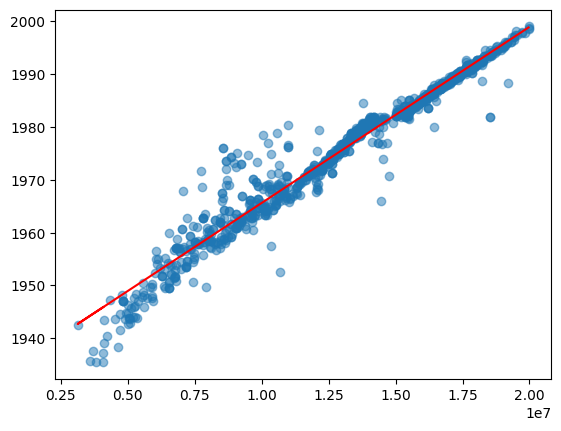

In [8]:
plt.scatter(df["run"], df["birthyear"], alpha=0.5)
plt.plot(X, lineal_reg.predict(X), color="red")


In [20]:
prediccion = lineal_reg.predict(np.array(17409822).reshape(-1, 1))[0]
prediccion

1990.3429888457688

In [18]:
def parse_decimal_year(year: float) -> str:
    """
    Parse a decimal year into a string of the form "YYYY-MM-DD".
    """

    year = int(year)
    month = int((year - int(year)) * 12) + 1
    day = 1
    return f"{year}-{month:02d}-{day:02d}"

In [24]:
parse_decimal_year(prediccion)

'1990-1-1'

In [21]:
int(1990.3429888457688)

1990

In [22]:
int((prediccion - int(prediccion)) * 12) + 1

5

In [27]:
def parse_decimal_year(decimal_year: float) -> str:
    """
    Parse a decimal year into a string of the form "YYYY-MM".
    """

    year = int(decimal_year)
    month = int((decimal_year - year) * 12) + 1
    return f"{year}-{month:02d}"

In [28]:
parse_decimal_year(prediccion)

'1990-05'